In [1]:
!gdown --id '1C9lV8qLJo-DAdL2r4HYCOPaBD2YI83x7' --output downstream.xlsx

Downloading...
From: https://drive.google.com/uc?id=1C9lV8qLJo-DAdL2r4HYCOPaBD2YI83x7
To: /content/downstream.xlsx
100% 12.1k/12.1k [00:00<00:00, 4.80MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('downstream.xlsx')
rows = df.shape[0]

In [18]:
time_label = []
for i in range(1, rows):
    time_label.append(df.iat[i, 0])

In [36]:
downstream = []
asus = []
acer = []
quanta = []
inventec = []
name = ['asus', 'acer', 'quanta', 'inventec']
downstream.append(asus)
downstream.append(acer)
downstream.append(quanta)
downstream.append(inventec)
for j in range(4):
  for k in range(1, rows):
    downstream[j].append(df.iat[k, (2*j)+1])

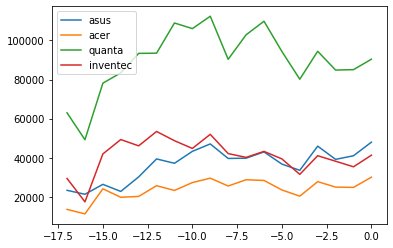

In [47]:
##Row data plot
tl = []
for element in time_label:
  tl.append(int(element.split('年')[1][:-1]) + 12*int(element.split('年')[0][3])-18)

for k in range(4):
  plt.plot(tl, downstream[k], label = name[k])
plt.legend()
plt.show()

In [56]:
downstream_normed = []
for s in range(4):
  downstream_normed.append([])
for i in range(4):
  u = (sum(downstream[i])/len(downstream[i]))
  for ele in downstream[i]:
    downstream_normed[i].append((ele - u) / u)

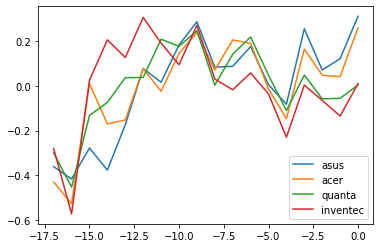

In [57]:
#把銷售額各自做出標準化後重新呈現
for k in range(4):
  plt.plot(tl, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

In [58]:
import statistics
std_compare = []
for i in range(4):
    std_compare.append(statistics.stdev(downstream_normed[i]))
std_compare

##四家電子業在過去18個月的營業額分散程度是接近的，不過廣達較為穩定

[0.23208332496889944,
 0.2180440751257734,
 0.18009813035747807,
 0.2120232207450022]

In [64]:
#處理股價資訊
import csv
!gdown --id '1WyB6qXrdsrsAoDW-mek4iN50w5dIUh5e' --output asus.csv
!gdown --id '1oHF1z_QjQ5L9b1pww8CXYM7y_dVF923w' --output acer.csv

Downloading...
From: https://drive.google.com/uc?id=1WyB6qXrdsrsAoDW-mek4iN50w5dIUh5e
To: /content/asus.csv
100% 22.4k/22.4k [00:00<00:00, 41.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oHF1z_QjQ5L9b1pww8CXYM7y_dVF923w
To: /content/acer.csv
100% 21.9k/21.9k [00:00<00:00, 15.2MB/s]


In [73]:
#處理確診人數資訊
!gdown --id '151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0' --output china.xlsx
!gdown --id '12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG' --output taiwan.xlsx
!gdown --id '1nglelEdrfH_fskn7m24FDc97Mn4hqh2v' --output america.xlsx
!gdown --id '14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x' --output europe.xlsx

Downloading...
From: https://drive.google.com/uc?id=151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0
To: /content/china.xlsx
100% 103k/103k [00:00<00:00, 28.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG
To: /content/taiwan.xlsx
100% 110k/110k [00:00<00:00, 32.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nglelEdrfH_fskn7m24FDc97Mn4hqh2v
To: /content/america.xlsx
100% 61.1k/61.1k [00:00<00:00, 22.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x
To: /content/europe.xlsx
100% 112k/112k [00:00<00:00, 40.8MB/s]


In [74]:
taiwan = pd.read_excel('taiwan.xlsx')
rows = taiwan.shape[0]
china = pd.read_excel('china.xlsx')
america = pd.read_excel('america.xlsx')
europe = pd.read_excel('europe.xlsx')
taiwan.iat[1, 5]

15637

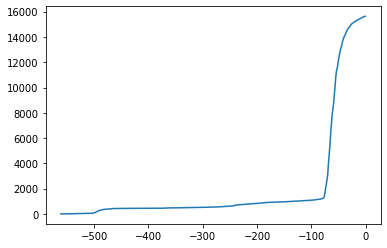

In [75]:
# Taiwan  Report
T = []
for i in range(1, taiwan.shape[0]):
  T.append(taiwan.iat[i, 5])
 
days = list(range(len(T)))
days.reverse()

r = len(T)
for k in range(r):
  days[k] -= r
plt.plot(days, T)

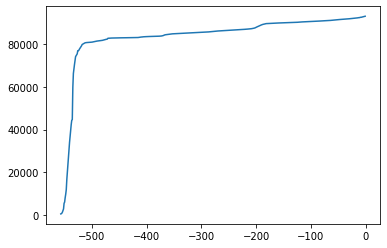

In [76]:
#China Report
C = []
for i in range(1, china.shape[0]):
  C.append(china.iat[i, 5])
 
days = list(range(len(C)))
days.reverse()

r = len(C)
for k in range(r):
  days[k] -= r
plt.plot(days, C)

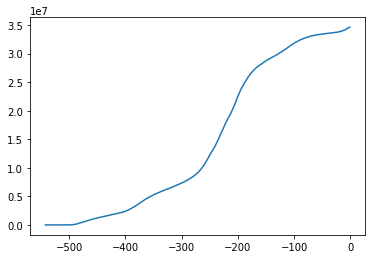

In [79]:
#America Report
A = []
for i in range(1, america.shape[0]):
  A.append(america.iat[i, 3])
 
days = list(range(len(A)))
days.reverse()

r = len(A)
for k in range(r):
  days[k] -= r
plt.plot(days, A)

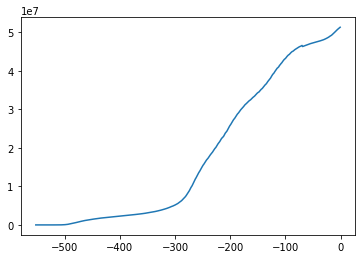

In [81]:
#Europe Report
E = []
for i in range(1, europe.shape[0]):
  E.append(europe.iat[i, 5])
 
days = list(range(len(E)))
days.reverse()

r = len(E)
for k in range(r):
  days[k] -= r
plt.plot(days, E)

In [92]:
#按月統計
from math import *
T_monthly = []
T_monthly_log = []
C_monthly = []
C_monthly_log = []
A_monthly = []
A_monthly_log = []
E_monthly = []
E_monthly_log = []

day = [16, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30]
count = 0
for ele in day:
  count += ele
  T_monthly.append(T[-1*count])
  T_monthly_log.append(log(T[-1*count]))
  C_monthly.append(C[-1*count])
  C_monthly_log.append(log(C[-1*count]))
  A_monthly.append(A[-1*count])
  A_monthly_log.append(log(A[-1*count]))
  E_monthly.append(E[-1*count])
  E_monthly_log.append(log(E[-1*count]))

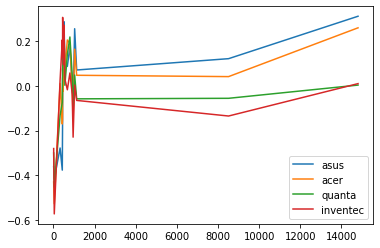

In [94]:
# 按照總確診人數按月畫出的營業額變化
for k in range(4):
  plt.plot(T_monthly, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

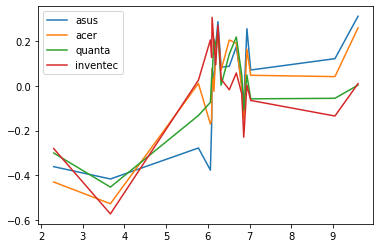

In [95]:
#log scale  plotting
#想一想，為甚麼我要這麼做??
for k in range(4):
  plt.plot(T_monthly_log, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

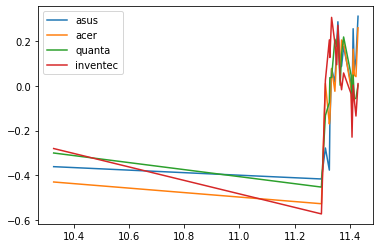

In [96]:
#改成中國
for k in range(4):
  plt.plot(C_monthly_log, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

#疫情在中國""剛爆發"的時間點，對下游科技業的衝擊是最顯著的

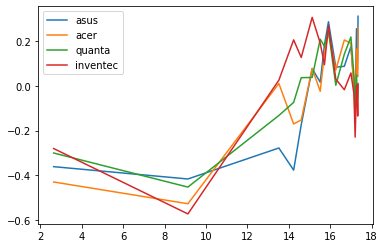

In [97]:
#改成美國
for k in range(4):
  plt.plot(A_monthly_log, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

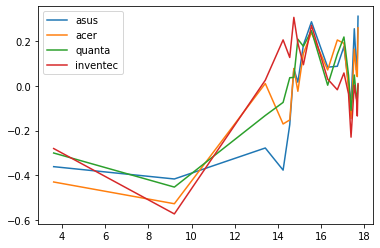

In [98]:
#改成歐洲
for k in range(4):
  plt.plot(E_monthly_log, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

#歐洲疫情分布確實與美國相當接近
#這四張圖的高點皆出現在圖中右上方的地方，
#除了跟金融環境有關之外，告訴我們:隨著時間推展
#企業逐漸適應了疫情的考驗而生存並求成長

In [106]:
# 計算四家下游企業和台灣總確診人數的相關係數
import scipy.stats as stats
for i in range(4):
    print(name[i]+'營業額和台灣確診人數(log)的相關係數  =',stats.pearsonr(T_monthly_log, downstream_normed[i])[0])

asus營業額和台灣確診人數(log)的相關係數  = 0.6966384960317945
acer營業額和台灣確診人數(log)的相關係數  = 0.7231766455163539
quanta營業額和台灣確診人數(log)的相關係數  = 0.47630997312901063
inventec營業額和台灣確診人數(log)的相關係數  = 0.3332065800061112


In [107]:
for i in range(4):
    print(name[i]+'營業額和中國確診人數(log)的相關係數  =',stats.pearsonr(C_monthly_log, downstream_normed[i])[0])

asus營業額和中國確診人數(log)的相關係數  = 0.48418436266296105
acer營業額和中國確診人數(log)的相關係數  = 0.558690902933963
quanta營業額和中國確診人數(log)的相關係數  = 0.4452496049761577
inventec營業額和中國確診人數(log)的相關係數  = 0.3105588957392214


In [108]:
for i in range(4):
    print(name[i]+'營業額和美國確診人數(log)的相關係數  =',stats.pearsonr(A_monthly_log, downstream_normed[i])[0])

asus營業額和美國確診人數(log)的相關係數  = 0.7094194589935877
acer營業額和美國確診人數(log)的相關係數  = 0.7749336709630635
quanta營業額和美國確診人數(log)的相關係數  = 0.6637362655537039
inventec營業額和美國確診人數(log)的相關係數  = 0.46388100008124006


In [109]:
for i in range(4):
    print(name[i]+'營業額和歐洲確診人數(log)的相關係數  =',stats.pearsonr(E_monthly_log, downstream_normed[i])[0])

#看起來銷售額和歐美國家的總確診是較為密切的(尤其是華碩和宏碁)
#可以想見兩家廠商的消費市場是國外大於國內

asus營業額和歐洲確診人數(log)的相關係數  = 0.7119359708568528
acer營業額和歐洲確診人數(log)的相關係數  = 0.7686323310489244
quanta營業額和歐洲確診人數(log)的相關係數  = 0.6282636019862113
inventec營業額和歐洲確診人數(log)的相關係數  = 0.4175378636216074


[10, 29, 283, 107, 13, 5, 20, 21, 26, 41, 120, 124, 112, 44, 75, 98, 7383, 6293]


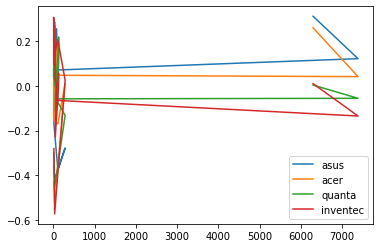

In [102]:
#如果我們不是參考累計確診，而是單月確診人數呢??
#Taiwan
netT = []
netT_log = []
netT.append(T_monthly[0])
netT_log.append(log(T_monthly[0]))
for i in range(1,len(T_monthly)):
  netT.append(T_monthly[i] - T_monthly[i-1])
  netT_log.append(log(T_monthly[i] - T_monthly[i-1]))
print(netT)
for k in range(4):
  plt.plot(netT, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

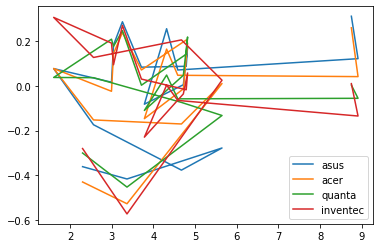

In [104]:
for k in range(4):
  plt.plot(netT_log, downstream_normed[k], label = name[k])
plt.legend()
plt.show()

#看起來散成一團，對吧

In [147]:
#小心讀csv和excel是用不同的套件
import numpy as np
dates = []
with open('asus.csv', newline='') as csvfile1:
    asus_raw = list(csv.reader(csvfile1))
    asus_stock = np.array(asus_raw[1:])[:, 6].astype(float)
    dates = np.array(asus_raw[1:])[:, 0]
with open('acer.csv', newline='') as csvfile2:
    acer_raw = list(csv.reader(csvfile2))
    acer_stock = np.array(acer_raw[1:])[:, 6].astype(float)

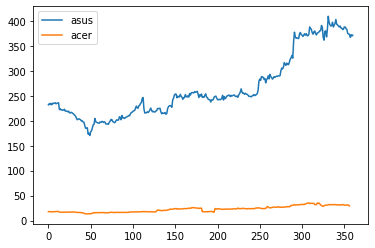

In [146]:
#這是隨著日期一天天變化的股價(收盤價)
plt.plot(list(range(len(asus_stock))), asus_stock, label = name[0])
plt.plot(list(range(len(acer_stock))), acer_stock, label = name[1])
plt.legend()
plt.show()

#acer看齊來平緩，是因為scale沒有被調整

In [149]:
stock = []
stock.append(asus_stock)
stock.append(acer_stock)
stock_normed = []
for s in range(2):
  stock_normed.append([])
for i in range(2):
  u = (sum(stock[i])/len(stock[i]))
  for ele in stock[i]:
    stock_normed[i].append((ele - u) / u)

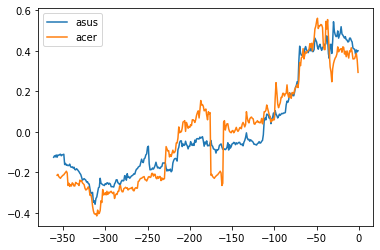

In [155]:
#將數據正規化(Normalize後，兩者浮動的趨勢非常接近)
#x座標代表:距離六月底開始倒數的天數
for k in range(2):
    plt.plot(list((i - len(stock_normed[k])) for i in range(len(stock_normed[k]))), stock_normed[k], label = name[k])
plt.legend()
plt.show()

In [157]:
#分成各個月份的平均股價來呈現
s = 0
monthly_days = dict()
for ele in dates:
    if not ele[0:7] in monthly_days:
        monthly_days[ele[0:7]] = 1
    else:
        monthly_days[ele[0:7]] += 1
print(monthly_days)   ##每個月有紀錄股價的天數

{'109/01/': 15, '109/02/': 19, '109/03/': 22, '109/04/': 20, '109/05/': 20, '109/06/': 20, '109/07/': 23, '109/08/': 21, '109/09/': 22, '109/10/': 19, '109/11/': 21, '109/12/': 23, '110/01/': 20, '110/02/': 13, '110/03/': 22, '110/04/': 19, '110/05/': 21, '110/06/': 21}


In [ ]:
##  TODO:
# 計算各月平均股價的波動圖形
##  和上面的方法類似的，衡量確診與股價之間的關係，可以的話做出歸納性的統整結論
###  試著套在中游廠商分析數據
#####  找出我寫的crappy code的bug